In [90]:
import os
import glob
import sys
import pandas as pd
import numpy as np
# plotting modules
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl
# import some custom funcs|
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

import importlib

In [91]:
%matplotlib notebook

In [92]:
util.set_sns_style(style='dark') # plotting settings i like for Nbs

In [93]:
# Set rootdir - I usually set this to the parent dir of all the data
rootdir = '/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com\
/My Drive/Edge_Tracking/Data'

# Specify experiment to analyze
# experiment = 'stripgrid_hdc-sytGCaMP7f_2p/20221102' 
# experiment = 'HDC_inhibition_CM' 
experiment = 'Noelle PAM Orco expts/Orco activation light strip'
src_dir = os.path.join(rootdir, experiment)

# Create a save dir for figures wherever you want
# I create a separate dir since I don't want to mess with Andy's existing organization
save_dir = '/Users/julianarhee/Documents/rutalab/data/figures/{}'.format(experiment)
save_dir = save_dir.replace(" ", "")
print("Saving figures to:{}    {}".format('\n', save_dir))
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Create a label/ID for figures so you always know where the plotted data came from
fig_id = src_dir.split('/My Drive')[1] #, experiment) 

Saving figures to:
    /Users/julianarhee/Documents/rutalab/data/figures/NoellePAMOrcoexpts/Orcoactivationlightstrip


In [94]:
# get a list of all the data files
#fly='Fly1'
log_files = sorted([k for k in glob.glob(os.path.join(src_dir, '1111*.log'))\
                if 'lossed tracking' not in k], key=util.natsort)
print("Found {} tracking files.".format(len(log_files)))
for i, fn in enumerate(log_files):
    print("{}: {}".format(i, os.path.split(fn)[-1]))

Found 6 tracking files.
0: 11112022-094503_Orco_activation_light_strip.log
1: 11112022-104610_Orco_activation_light_strip.log
2: 11112022-110246_Orco_activation_light_strip.log
3: 11112022-122209_Orco_activation_light_strip.log
4: 11112022-131059_Orco_activation_light_strip.log
5: 11112022-132150_Orco_activation_light_strip.log


## select 1 file

In [125]:
file_ix = -3 # select a file
fpath = log_files[file_ix]
fname = os.path.splitext(os.path.split(fpath)[-1])[0]
print("Selected: {}".format(fpath))

Selected: /Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/Noelle PAM Orco expts/Orco activation light strip/11112022-122209_Orco_activation_light_strip.log


In [126]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [113]:
# try to parse experiment details from the filename
# exp, datestr, fid, cond = butil.parse_info_from_file(fpath)
# load and process the csv data  
df0 = butil.load_dataframe(fpath, parse_filename=False, 
                           verbose=False, plot_errors=False)
# print('Experiment: {}{}Fly ID: {}{}Condition: {}'.format(exp, '\n', fid, '\n', cond))
#fly_id = df0['fly_id'].unique()[0]
df0 = butil.process_df(df0)

/Users/julianarhee/Repositories/plume-tracking/behavior.py:669: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for trial_id, df_ in df.groupby(['trial_id']):


,timestamp -- motor_step_command,mfc1_stpt,mfc2_stpt,mfc3_stpt,led1_stpt,led2_stpt,sig_status,ft_posx,ft_posy,ft_frame,...,trial_id,boutnum,cum_time,speed,upwind_speed,crosswind_speed,euclid_dist,upwind_dist,crosswind_dist,bout_type
0,11/11/2022-12:22:09.758776 -- 799970,0.4,0.0,0.0,1.0,0.0,0,0.681915,0.750762,30,...,11112022-122209_Orco_activation_light_strip,1,0.000000,0.129023,-0.009081,-0.128703,NaN,NaN,NaN,outstrip
1,11/11/2022-12:22:09.806504 -- 799974,0.4,0.0,0.0,1.0,0.0,0,0.675772,0.750329,33,...,11112022-122209_Orco_activation_light_strip,1,0.047728,3.153676,1.780290,-2.603122,0.006158,-0.000433,0.006143,outstrip
2,11/11/2022-12:22:09.825067 -- 800005,0.4,0.0,0.0,1.0,0.0,0,0.509351,0.868779,36,...,11112022-122209_Orco_activation_light_strip,1,0.114019,4.309061,2.523169,-3.493083,0.204271,0.118451,0.166421,outstrip
3,11/11/2022-12:22:09.857644 -- 800014,0.4,0.0,0.0,1.0,0.0,0,0.497135,0.879364,38,...,11112022-122209_Orco_activation_light_strip,1,0.212887,2.880984,2.850125,0.420542,0.016163,0.010584,0.012215,outstrip
4,11/11/2022-12:22:09.888485 -- 800015,0.4,0.0,0.0,1.0,0.0,0,0.536021,1.049528,40,...,11112022-122209_Orco_activation_light_strip,1,0.342596,5.223564,4.682690,2.314744,0.174551,0.170165,0.038885,outstrip


In [115]:
# get experimentally determined odor boundaries:
strip_width=50
strip_sep=200 # only matters for 2p
strip_borders = butil.find_strip_borders(df0, strip_width=strip_width) # ogrid = butil.get_odor_grid(df0, 

<IPython.core.display.Javascript object>


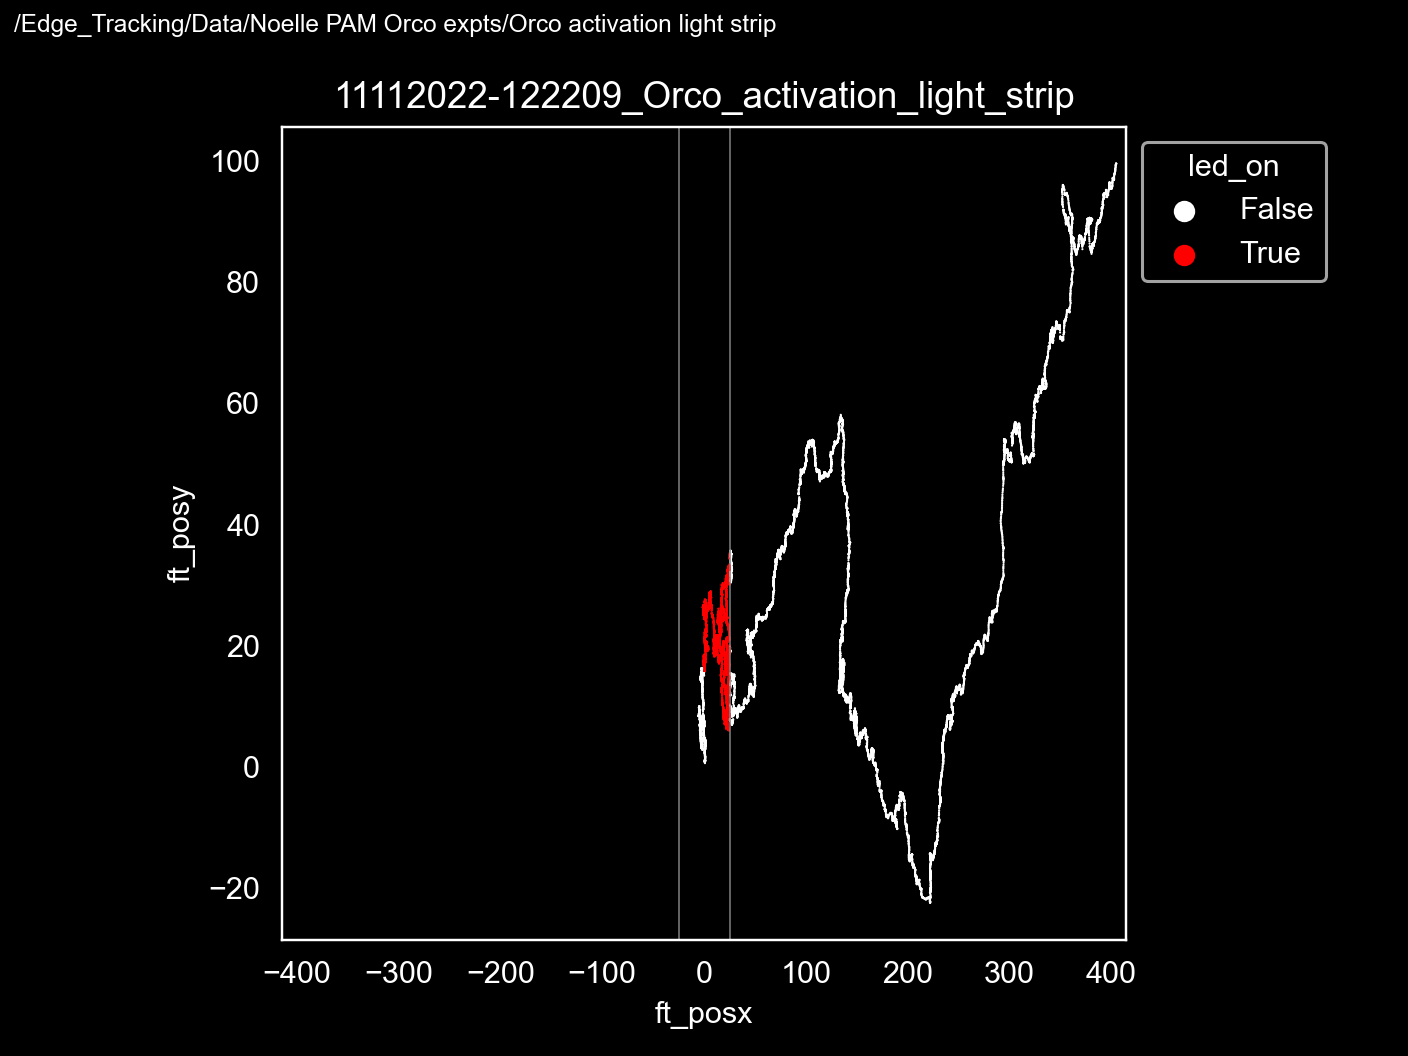

/Users/julianarhee/Documents/rutalab/data/figures/NoellePAMOrcoexpts/Orcoactivationlightstrip/trajectory_11112022-122209_Orco_activation_light_strip.png


In [127]:
# Set some plotting params 
hue_varname='led_on'
palette={True: 'r', False: 'w'}
start_at_odor = True
strip_width=10
odor_lc='lightgray'
odor_lw=0.5
odor_xmin, odor_xmax = strip_borders[0]
# ---------------------------------------------------------------------
fig, ax = pl.subplots()
sns.scatterplot(data=df0, x="ft_posx", y="ft_posy", ax=ax, 
                hue=hue_varname, s=0.5, edgecolor='none', palette=palette)
butil.plot_odor_corridor(ax, odor_xmin=odor_xmin, odor_xmax=odor_xmax)
ax.legend(bbox_to_anchor=(1,1), loc='upper left', title=hue_varname)
ax.set_title(fname)
pl.subplots_adjust(left=0.2, right=0.8)
# Center corridor
xmax = np.ceil(df0['ft_posx'].abs().max())
ax.set_xlim([-xmax-10, xmax+10])
# label figure and save
util.label_figure(fig, fig_id)
figname = 'trajectory_{}'.format(fname)
pl.savefig(os.path.join(save_dir, '{}.png'.format(figname))) #, dpi=dpi)
print(os.path.join(save_dir, '{}.png'.format(figname)))

In [123]:
fname

'11112022-122209_Orco_activation_light_strip.log'